In [1]:
import pandas as pd

# Load the dataset
file_path = 'dementia_dataset.csv'
dementia_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
dementia_data.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [2]:
# Checking for missing values in the dataset
missing_values = dementia_data.isnull().sum()
missing_values


Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [3]:
# Checking for unique values in key columns
unique_groups = dementia_data['Group'].unique()
unique_groups


array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [4]:
unique_visits = dementia_data['Visit'].unique()
unique_visits

array([1, 2, 3, 4, 5])

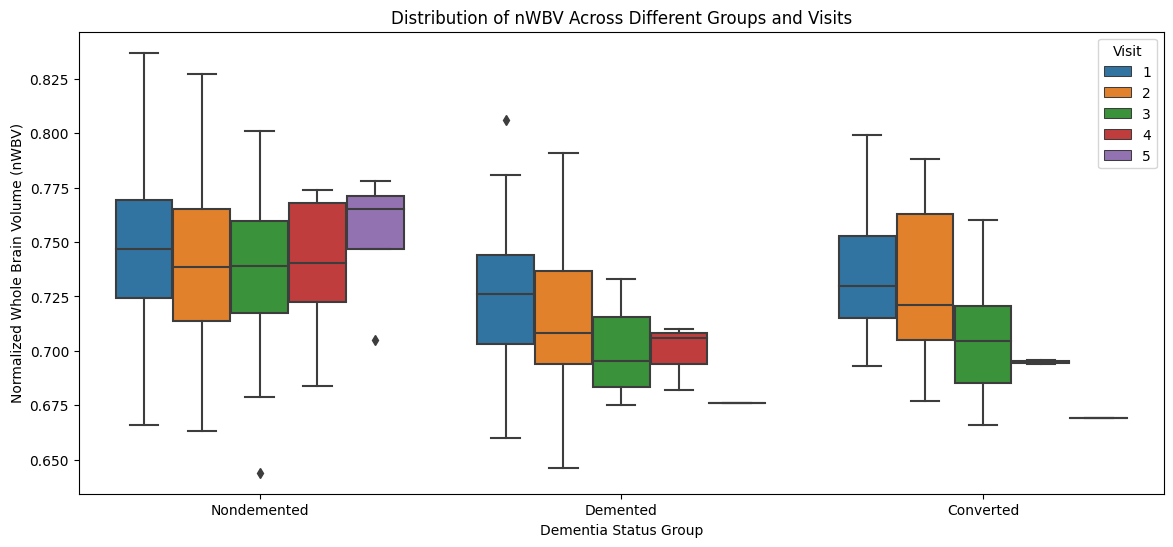

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


# Exploring the distribution of nWBV across different groups and visits
plt.figure(figsize=(14, 6))

# Boxplot to show distribution of nWBV in different groups and visits
sns.boxplot(x='Group', y='nWBV', hue='Visit', data=dementia_data)
plt.title("Distribution of nWBV Across Different Groups and Visits")
plt.xlabel("Dementia Status Group")
plt.ylabel("Normalized Whole Brain Volume (nWBV)")
plt.legend(title="Visit", loc='upper right')
plt.show()


In [8]:
# Adjusting the approach to correctly calculate and merge the change in nWBV

# Keeping the original index after sorting
dementia_data_sorted = dementia_data.sort_values(by=['Subject ID', 'Visit'])
dementia_data_sorted['original_index'] = dementia_data_sorted.index

# Grouping the data by Subject ID and calculating the change in nWBV
grouped_data = dementia_data_sorted.groupby('Subject ID')
nwbv_changes = grouped_data['nWBV'].diff().rename('nWBV_Change')

# Merging the changes back into the sorted dataset using the original index
dementia_data_sorted = dementia_data_sorted.join(nwbv_changes, on='original_index')

# Filtering out the first visit of each subject
merged_data_filtered = dementia_data_sorted[dementia_data_sorted['Visit'] != 1]

merged_data_filtered.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,original_index,nWBV_Change
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,1,-0.015
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,3,-0.023
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,4,-0.012
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462,6,0.008
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032,8,-0.001


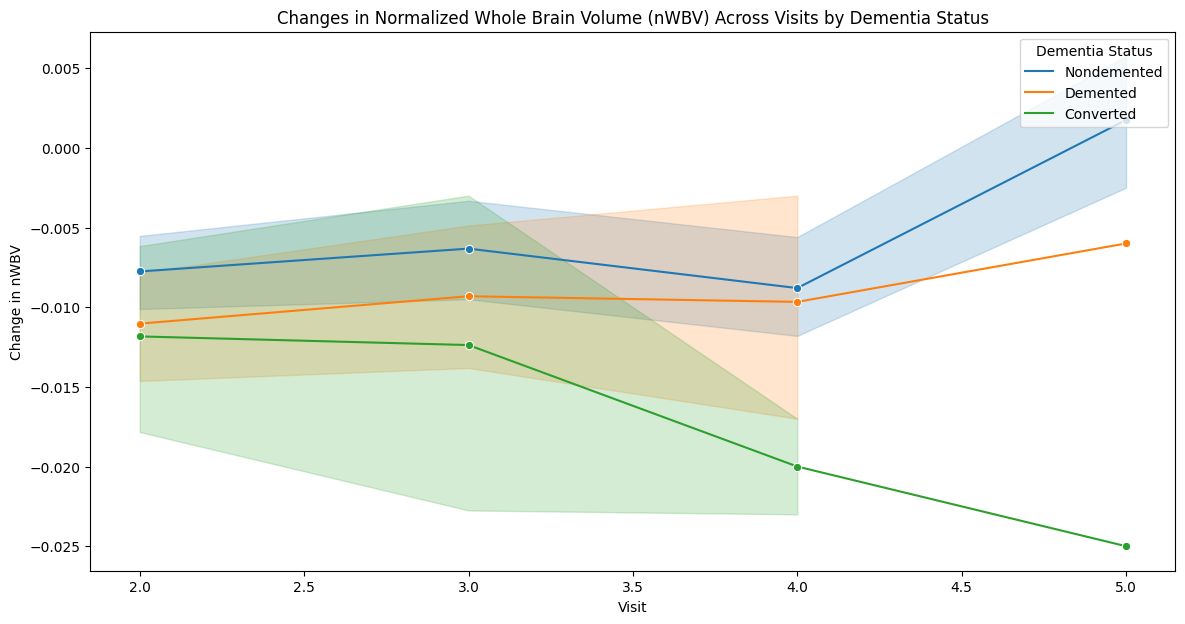

In [9]:
# Visualizing the changes in nWBV over time for each dementia status group

plt.figure(figsize=(14, 7))

# Using a lineplot to show the trend of nWBV change across visits, categorized by dementia status
sns.lineplot(data=merged_data_filtered, x="Visit", y="nWBV_Change", hue="Group", marker="o")

plt.title("Changes in Normalized Whole Brain Volume (nWBV) Across Visits by Dementia Status")
plt.xlabel("Visit")
plt.ylabel("Change in nWBV")
plt.legend(title="Dementia Status", loc='upper right')
plt.show()


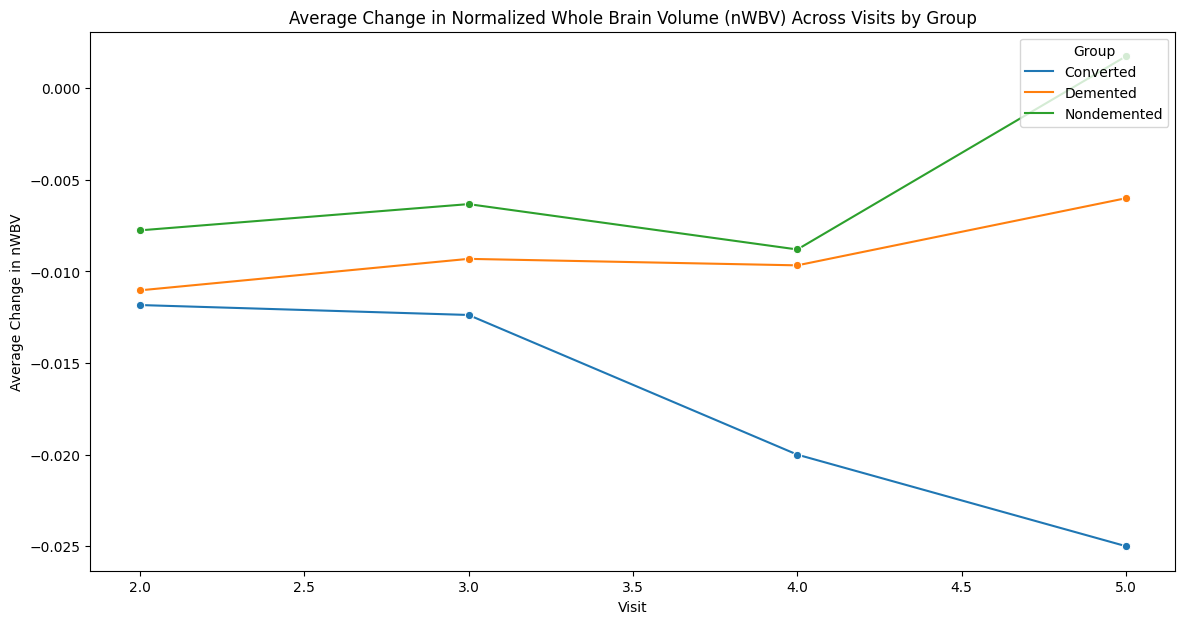

In [10]:
# Calculating the average change in nWBV for each group across visits
average_nwbv_change_per_group = merged_data_filtered.groupby(['Group', 'Visit'])['nWBV_Change'].mean().reset_index()

# Visualizing the average change in nWBV for each group across visits
plt.figure(figsize=(14, 7))
sns.lineplot(data=average_nwbv_change_per_group, x="Visit", y="nWBV_Change", hue="Group", marker="o")

plt.title("Average Change in Normalized Whole Brain Volume (nWBV) Across Visits by Group")
plt.xlabel("Visit")
plt.ylabel("Average Change in nWBV")
plt.legend(title="Group", loc='upper right')
plt.show()


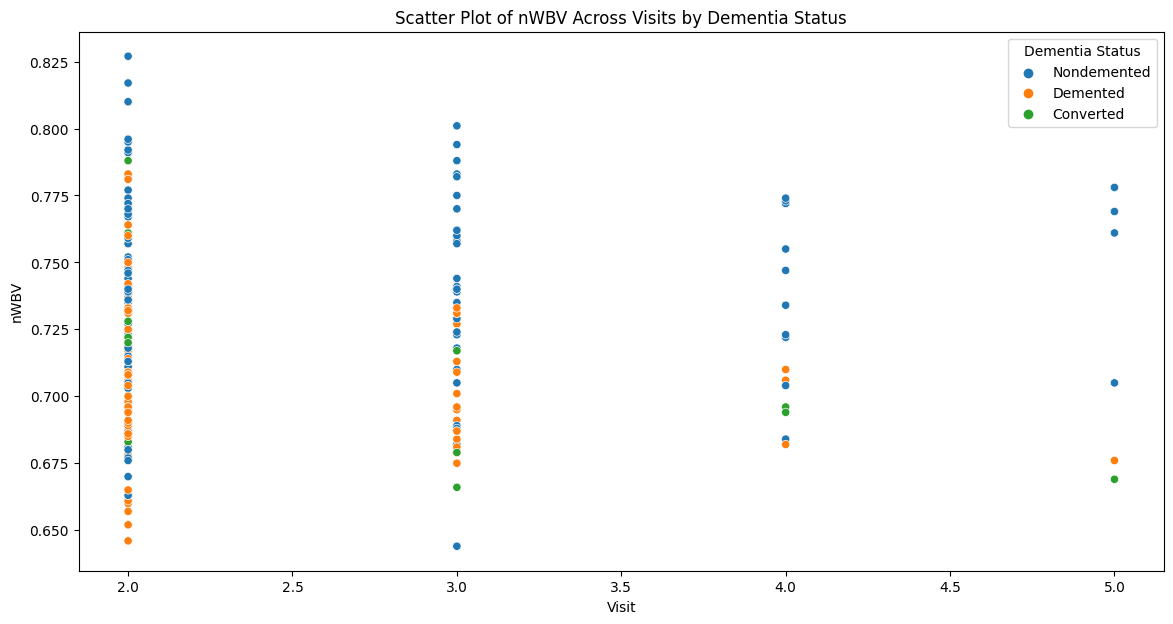

In [11]:
# Visualizing the changes in nWBV over time for each group using scatter plots

plt.figure(figsize=(14, 7))

# Using scatterplot to show the trend of nWBV change across visits for each subject, categorized by dementia status
sns.scatterplot(data=merged_data_filtered, x="Visit", y="nWBV", hue="Group")

plt.title("Scatter Plot of nWBV Across Visits by Dementia Status")
plt.xlabel("Visit")
plt.ylabel("nWBV")
plt.legend(title="Dementia Status", loc='upper right')
plt.show()
